In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# prepare data
df = pd.read_csv("Voc-SoE.csv")
data = df.to_numpy()
x_train = data[:,1].reshape(-1,1)
y_train = data[:,0].ravel()

# train model
model = MLPRegressor(hidden_layer_sizes=(1000,100,100), activation = 'tanh', solver = 'adam')
model.fit(x_train,y_train)

# test accuracy
y_pred = model.predict(x_train).reshape(-1,1)
# print(f"coefs = {model.coefs_}")
# print(f"intercepts = {model.intercepts_}")
print(f"score = {r2_score(y_train,y_pred)}")

score = 0.9988484220926135


In [38]:
# the approximate open circuit voltage used in google sheets
x_approx = np.arange(0,101)
gradient = (4.2 - 2.5)/100
intercept = 2.5
y_approx = gradient*x_approx + intercept

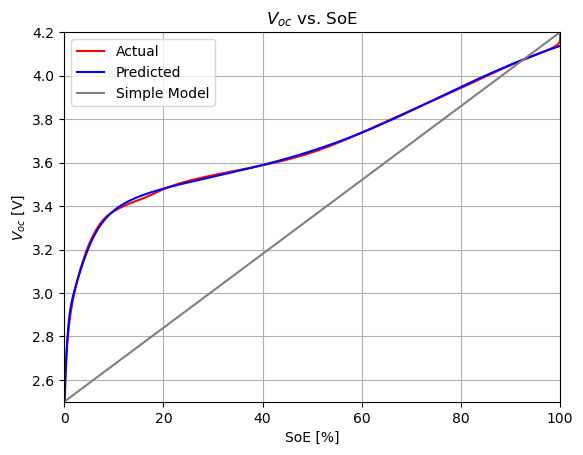

In [39]:
plt.plot(x_train,y_train, 'r', label = "Actual")
plt.plot(x_train, y_pred, 'b', label = "Predicted")
plt.plot(x_approx, y_approx, 'grey', label = "Simple Model")
plt.title("$V_{oc}$ vs. SoE")
plt.xlabel("SoE [%]")
plt.ylabel("$V_{oc}$ [V]")
plt.xlim(0,100)
plt.ylim(2.5,4.2)
plt.grid(1)
plt.legend()
plt.show()

In [69]:
# get the gradient of the curve
dydx = []
step = 1

for i in range(len(x_train)-1):
    g = (y_train[i+step] - y_train[i])/(x_train[i+step] - x_train[i])
    dydx.append(g)

dydx = np.array(dydx)

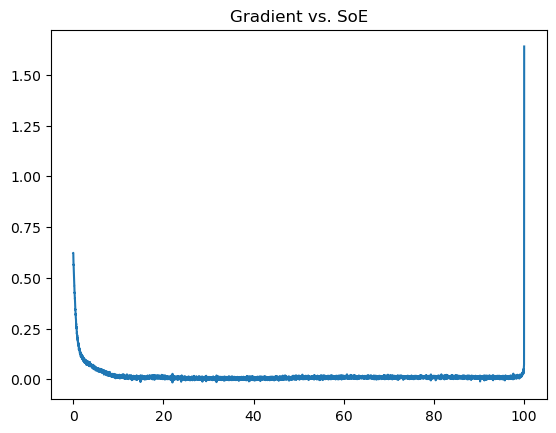

In [120]:
plt.plot(x_train[1:],dydx)
plt.title("Gradient vs. SoE")
plt.show()

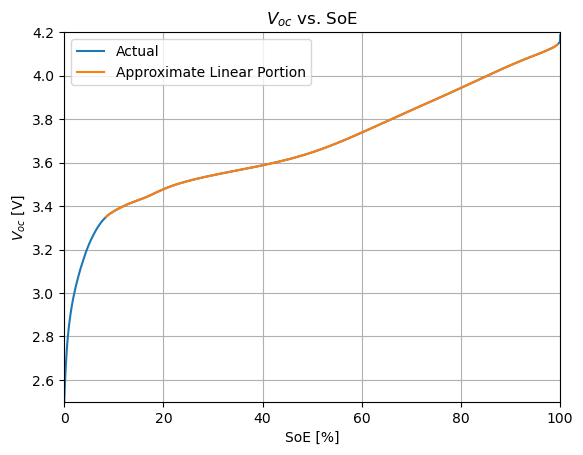

In [167]:
thresh = 0.015
to_take = np.where(dydx <= thresh)
x_train_lin = x_train[to_take[0]]
y_train_lin = y_train[to_take[0]]

plt.plot(x_train, y_train, label = "Actual")
plt.plot(x_train_lin, y_train_lin, label = "Approximate Linear Portion")
plt.title("$V_{oc}$ vs. SoE")
plt.xlabel("SoE [%]")
plt.ylabel("$V_{oc}$ [V]")
plt.xlim(0,100)
plt.ylim(2.5,4.2)
plt.grid(1)
plt.legend()
plt.show()


In [168]:
model = LinearRegression()
model.fit(x_train_lin, y_train_lin)

y_pred_lin = model.predict(x_train_lin)
print(f"y_hat = ({model.coef_[0]:.6e})x_hat + {model.intercept_:.6f}")
print(f"r2 score:{r2_score(y_train_lin, y_pred_lin):.3f}")

y_hat = (8.161657e-03)x_hat + 3.281916
r2 score:0.983


In [169]:
# the minimum SoE if we want to stick with a (good enough) linear model
print(x_train_lin[-1])

[8.45415928]


In [170]:
x_pred_lin = np.linspace(0,101,100)
y_pred_lin = model.predict(x_pred_lin.reshape(-1,1))

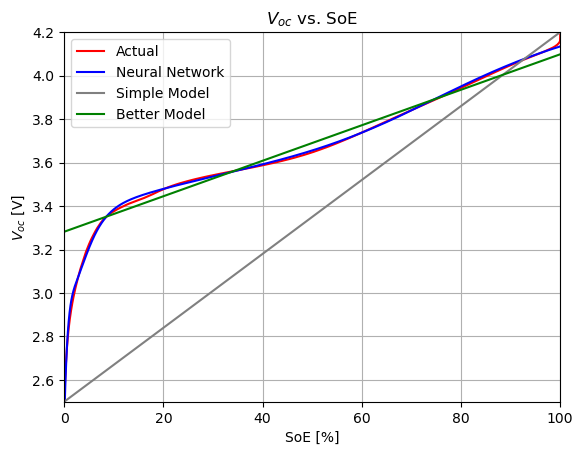

In [172]:
plt.plot(x_train,y_train, 'r', label = "Actual")
plt.plot(x_train, y_pred, 'b', label = "Neural Network")
plt.plot(x_approx, y_approx, 'grey', label = "Simple Model")
plt.plot(x_pred_lin, y_pred_lin,'green', label = "Better Model")
plt.title("$V_{oc}$ vs. SoE")
plt.xlabel("SoE [%]")
plt.ylabel("$V_{oc}$ [V]")
plt.xlim(0,100)
plt.ylim(2.5,4.2)
plt.grid(1)
plt.legend()
plt.show()